# Library and Global Variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [2]:
TSYNC2_PATH = 'path/to/tsync2.csv' # default baseline path

# Preparing the Methods

In [27]:
def get_distribution(csv_path: str) -> defaultdict:
    df = pd.read_csv(csv_path)
    dist = defaultdict(lambda: 0)

    for row in df.iterrows():
        phonemes = row[1]['thai phoneme'].split()
        for phoneme in phonemes:
            dist[phoneme] += 1

    return dist

def unknown_phonemes(csv_path_1: str, csv_path_2: str = TSYNC2_PATH) -> list:
    dist1 = get_distribution(csv_path_1)
    dist2 = get_distribution(csv_path_2)

    unknown = []
    for phoneme in dist1.keys():
        if phoneme not in dist2.keys():
            unknown.append(phoneme)

    return unknown

def compare_distributions(csv_path_1: str, title_1: str, csv_path_2: str = TSYNC2_PATH, title_2: str = 'Tsync2', no_: bool = False) -> tuple:
    dist1 = get_distribution(csv_path_1)
    dist2 = get_distribution(csv_path_2)

    dist2 = {k: v for k, v in sorted(dist2.items(), key=lambda item: item[1], reverse=True)}
    total_vocabs = list(dist2.keys()) + unknown_phonemes(csv_path_1, csv_path_2)

    if no_:
        phoneme_1_counts = [dist1.get(ph, 0) for ph in total_vocabs if ph != '_']
        phoneme_2_counts = [dist2.get(ph, 0) for ph in total_vocabs if ph != '_']
        total_vocabs.remove('_')
    else:
        phoneme_1_counts = [dist1.get(ph, 0) for ph in total_vocabs]
        phoneme_2_counts = [dist2.get(ph, 0) for ph in total_vocabs]   

    np_phoneme_1_counts = np.array(phoneme_1_counts)/sum(phoneme_1_counts)
    np_phoneme_2_counts = np.array(phoneme_2_counts)/sum(phoneme_2_counts)

    index = np.arange(len(total_vocabs))
    bar_height = 0.5
    fig, ax = plt.subplots(figsize=(10, 20))

    bar1 = ax.barh(index, np_phoneme_1_counts, bar_height, color='blue', label=title_1)
    ax.plot(np_phoneme_2_counts, index, color='red', label=title_2)
    ax.set_title('Phoneme Distributions Comparison')
    ax.set_xlabel('Count')
    ax.set_ylabel('Phonemes')
    ax.set_yticks(index)
    ax.set_yticklabels(total_vocabs)
    ax.legend()

    plt.tight_layout()
    plt.show()
        


# Plot the Distributions

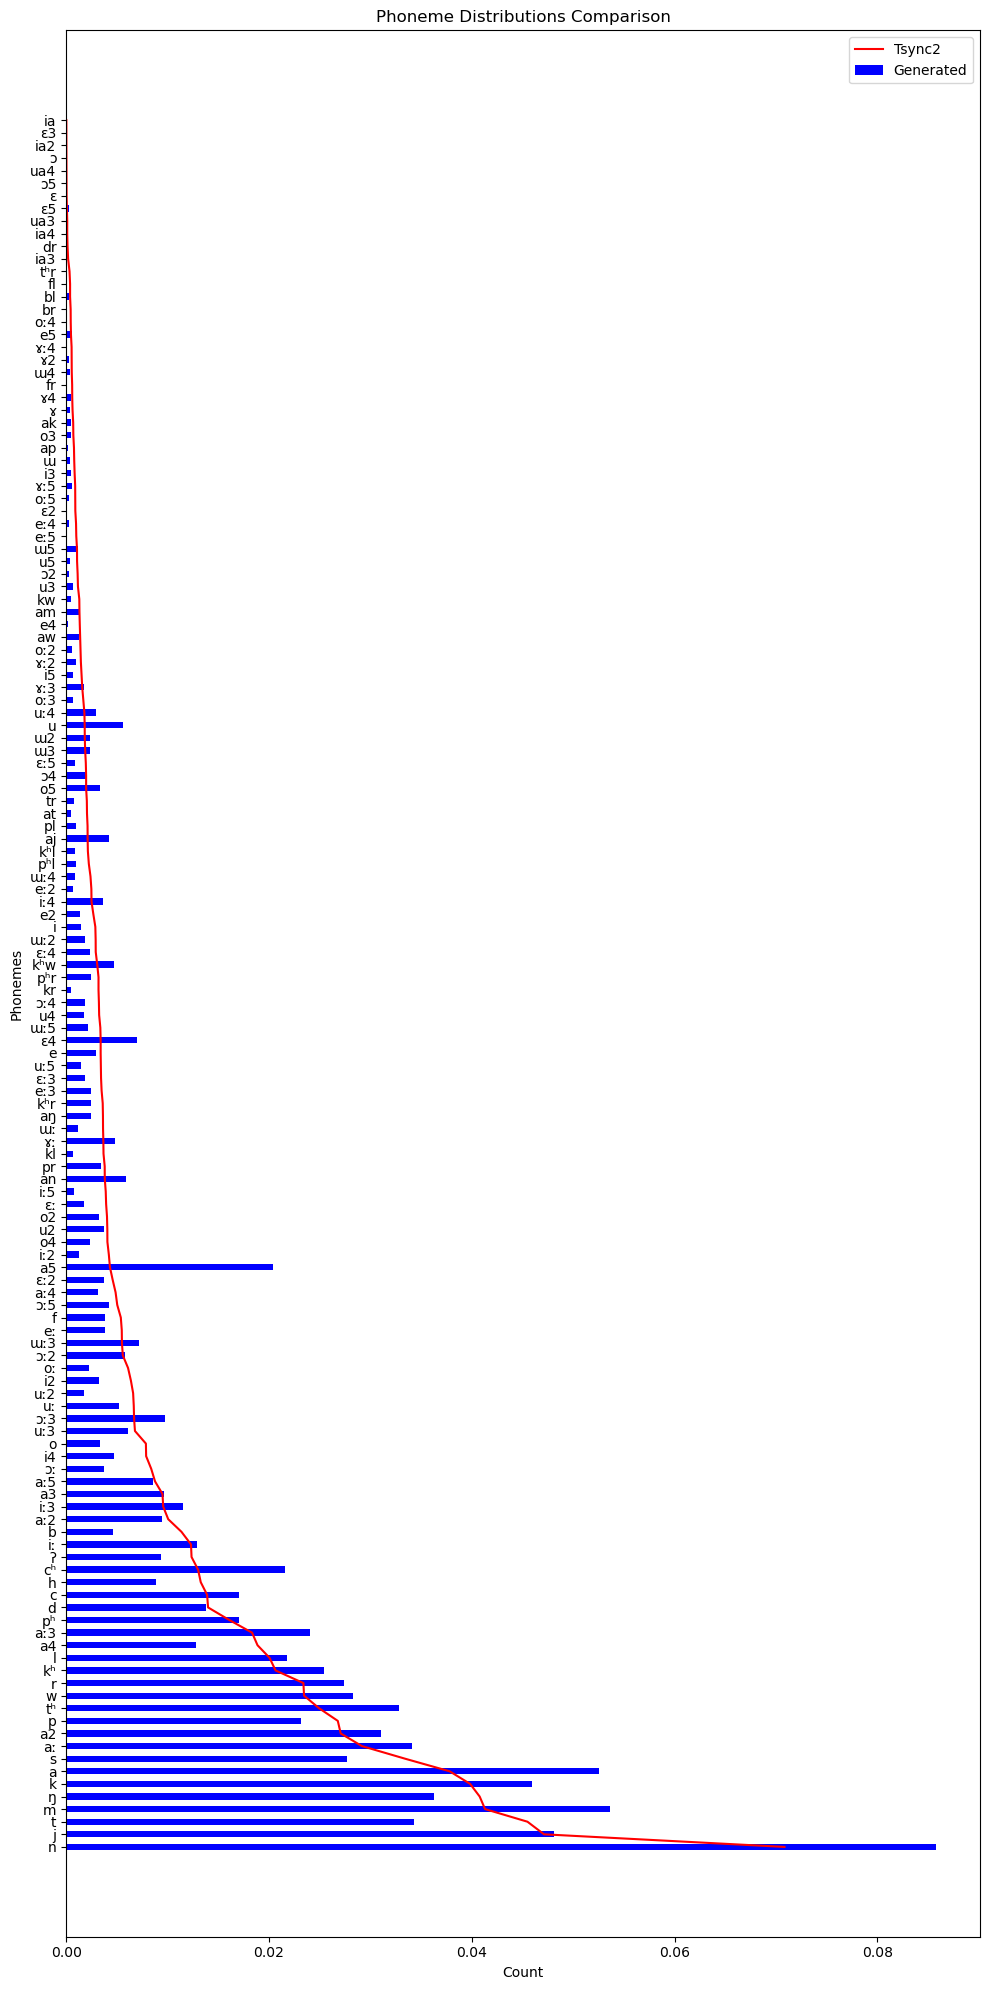

In [ ]:
generated_path = 'combined_sentences_with_phoneme.csv'
tsync2_path = 'combined_tsync2_thai_sentences.csv'

compare_distributions(generated_path, 'Generated', tsync2_path, 'Tsync2', no_=True)


# Check the Non-existing Phonemes

In [ ]:
print(f'In Generated but not in Tsync2: {unknown_phonemes(generated_path, tsync2_path)}')
print(f'In Tsync2 but not in Generated: {unknown_phonemes(tsync2_path, generated_path)}')

[]
['ɤː4', 'tʰr', 'br', 'fr', 'ia4', 'ᴐ5', 'oː4', 'fl', 'ᴐ', 'dr', 'ua3', 'ɛ', 'ia2', 'ia3', 'ua4', 'ɛ3', 'ia']
